Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Pre-processing

In [2]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [3]:
df_com['market_value']=df_com.spx

In [4]:
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

ARIMA

In [7]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 4191
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17248.281
Method:                       css-mle   S.D. of innovations             14.829
Date:                Mon, 02 Mar 2020   AIC                          34504.561
Time:                        19:53:27   BIC                          34529.924
Sample:                    01-04-2000   HQIC                         34513.530
                         - 01-26-2016                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1079      0.190      0.567      0.571      -0.265       0.481
ar.L1.D.market_value     0.6054      0.120      5.036      0.000       0.370       0.841
ma.L1.D.market_value    -0.6721      0.112     -6.006      0.000      -0.891      -0.453
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6519           +0.0000j            1.6519            0.0000
MA.1            1.4878           +0.0000j            1.4878            0.0000
-----------------------------------------------------------------------------
"""

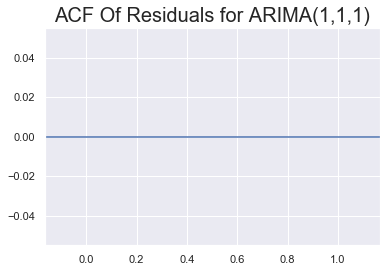

In [8]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

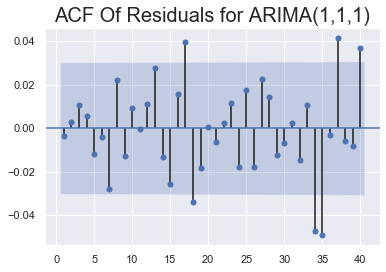

In [9]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

In [12]:
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [15]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -17248.280600029968 	 AIC =  34504.561200059936
ARIMA(2,1,1):  	 LL =  -17248.090627798905 	 AIC =  34506.18125559781
ARIMA(3,1,1):  	 LL =  -17247.963903565047 	 AIC =  34507.927807130094
ARIMA(3,1,2):  	 LL =  -17247.87021101288 	 AIC =  34509.74042202576


In [19]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

In [20]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 4191
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -17247.666
Method:                       css-mle   S.D. of innovations             14.827
Date:                Mon, 02 Mar 2020   AIC                          34511.332
Time:                        19:55:48   BIC                          34562.057
Sample:                    01-04-2000   HQIC                         34529.270
                         - 01-26-2016                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1078      0.199      0.542      0.588      -0.282       0.497
ar.L1.D.market_value    -0.8142      0.139     -5.845      0.000      -1.087      -0.541
ar.L2.D.market_value    -0.0938      0.022     -4.238      0.000      -0.137      -0.050
ar.L3.D.market_value    -0.0493      0.021     -2.378      0.017      -0.090      -0.009
ar.L4.D.market_value    -0.0256      0.020     -1.276      0.202      -0.065       0.014
ar.L5.D.market_value    -0.0282      0.016     -1.787      0.074      -0.059       0.003
ma.L1.D.market_value     0.7447      0.139      5.373      0.000       0.473       1.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2593           -0.0000j            1.2593           -0.5000
AR.2            1.5441           -1.8314j            2.3955           -0.1385
AR.3            1.5441           +1.8314j            2.3955            0.1385
AR.4           -1.3680           -1.7406j            2.2139           -0.3560
AR.5           -1.3680           +1.7406j            2.2139            0.3560
MA.1           -1.3428           +0.0000j            1.3428            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(5,1,1):  	 LL =  -17247.665772360204 	 AIC =  34511.33154472041
ARIMA(6,1,3):  	 LL =  -17243.101714288066 	 AIC =  34508.20342857613


In [23]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.028


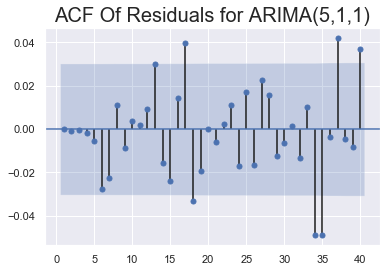

In [24]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

In [25]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 4191
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -17247.666
Method:                       css-mle   S.D. of innovations             14.827
Date:                Mon, 02 Mar 2020   AIC                          34511.332
Time:                        19:56:31   BIC                          34562.057
Sample:                    01-04-2000   HQIC                         34529.270
                         - 01-26-2016                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1078      0.199      0.542      0.588      -0.282       0.497
ar.L1.D.market_value    -0.8142      0.139     -5.845      0.000      -1.087      -0.541
ar.L2.D.market_value    -0.0938      0.022     -4.238      0.000      -0.137      -0.050
ar.L3.D.market_value    -0.0493      0.021     -2.378      0.017      -0.090      -0.009
ar.L4.D.market_value    -0.0256      0.020     -1.276      0.202      -0.065       0.014
ar.L5.D.market_value    -0.0282      0.016     -1.787      0.074      -0.059       0.003
ma.L1.D.market_value     0.7447      0.139      5.373      0.000       0.473       1.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2593           -0.0000j            1.2593           -0.5000
AR.2            1.5441           -1.8314j            2.3955           -0.1385
AR.3            1.5441           +1.8314j            2.3955            0.1385
AR.4           -1.3680           -1.7406j            2.2139           -0.3560
AR.5           -1.3680           +1.7406j            2.2139            0.3560
MA.1           -1.3428           +0.0000j            1.3428            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
df['delta_prices']=df.market_value.diff(1)

In [27]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 4191
Model:                     ARMA(1, 1)   Log Likelihood              -17248.281
Method:                       css-mle   S.D. of innovations             14.829
Date:                Mon, 02 Mar 2020   AIC                          34504.561
Time:                        19:56:35   BIC                          34529.924
Sample:                    01-04-2000   HQIC                         34513.530
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1079      0.190      0.567      0.571      -0.265       0.481
ar.L1.delta_prices     0.6054      0.120      5.036      0.000       0.370       0.841
ma.L1.delta_prices    -0.6721      0.112     -6.006      0.000      -0.891      -0.453
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6519           +0.0000j            1.6519            0.0000
MA.1            1.4878           +0.0000j            1.4878            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
sts.adfuller(df.delta_prices[1:])

(-49.19015565536986,
 0.0,
 1,
 4189,
 {'1%': -3.4319120223653132,
  '5%': -2.8622302155703507,
  '10%': -2.5671374076308826},
 34215.34467115904)

In [29]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags=10)
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.market_value   No. Observations:                 4190
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -17253.440
Method:                       css-mle   S.D. of innovations             14.847
Date:                Mon, 02 Mar 2020   AIC                          34514.880
Time:                        19:56:40   BIC                          34540.242
Sample:                    01-05-2000   HQIC                         34523.849
                         - 01-26-2016                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0002      0.000      1.320      0.187      -0.000       0.001
ar.L1.D2.market_value    -0.0666      0.015     -4.314      0.000      -0.097      -0.036
ma.L1.D2.market_value    -1.0000      0.001  -1443.462      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -15.0083           +0.0000j           15.0083            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

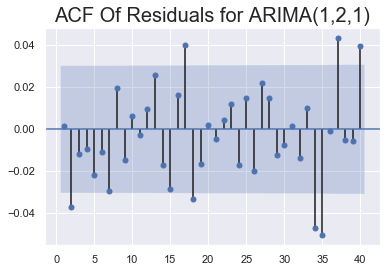

In [30]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

ARIMAX

In [31]:
model_ar_1_i_1_ma_1_Xdax = ARIMA(df.market_value, exog = df.dax, order=(1,1,1))
results_ar_1_i_1_ma_1_Xdax = model_ar_1_i_1_ma_1_Xdax.fit()
results_ar_1_i_1_ma_1_Xdax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 4191
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17248.042
Method:                       css-mle   S.D. of innovations             14.829
Date:                Mon, 02 Mar 2020   AIC                          34506.085
Time:                        19:56:43   BIC                          34537.788
Sample:                    01-04-2000   HQIC                         34517.296
                         - 01-26-2016                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3460      0.617     -0.561      0.575      -1.556       0.864
dax                   7.046e-05    9.2e-05      0.766      0.444      -0.000       0.000
ar.L1.D.market_value     0.6043      0.121      5.003      0.000       0.368       0.841
ma.L1.D.market_value    -0.6710      0.113     -5.964      0.000      -0.892      -0.450
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6549           +0.0000j            1.6549            0.0000
MA.1            1.4903           +0.0000j            1.4903            0.0000
-----------------------------------------------------------------------------
"""

SARIMAX

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 4192
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood               44383.887
Date:                           Mon, 02 Mar 2020   AIC                         -88753.774
Time:                                   19:56:48   BIC                         -88709.388
Sample:                               01-03-2000   HQIC                        -88738.078
                                    - 01-26-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            1.0000   5.18e-07   1.93e+06      0.000       1.000       1.000
ar.L1          0.9999      0.000   4650.767      0.000       0.999       1.000
ma.L1         -0.3975   1.59e-06   -2.5e+05      0.000      -0.397      -0.397
ar.S.L5        0.8167      0.000   3089.753      0.000       0.816       0.817
ar.S.L10       0.1828      0.000    682.225      0.000       0.182       0.183
ma.S.L5       -0.2252   9.54e-07  -2.36e+05      0.000      -0.225      -0.225
sigma2          1e-10   3.06e-11      3.265      0.001       4e-11     1.6e-10
===================================================================================
Ljung-Box (Q):                     2046.36   Jarque-Bera (JB):           3390338.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):      2491195211.00   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       142.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.45e+21. Standard errors may be unstable.
"""